In [1]:
import localgraphclustering as lgc
import numpy as np

import matplotlib.pyplot as plt


import sys
import os
sys.path.insert(0, os.path.join("..", "LocalGraphClustering", "notebooks"))
import helper



There are  1  connected components in the graph


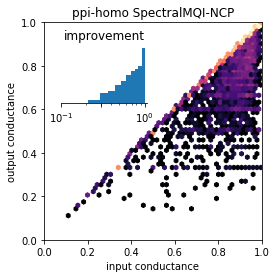

In [2]:
def run_local_fiedler_ncp(g, gname):
    ratio = 1.0
    if g._num_vertices > 5000:
        ratio = 0.8
    elif g._num_vertices > 7500:
        ratio = 0.6
    elif g._num_vertices > 10000:
        ratio = 0.4
    elif g._num_vertices > 100000:
        ratio = 0.1
    elif g._num_vertices > 1000000:
        ratio = 0.05
    ncp = lgc.NCPData(g)
    
    func = lambda G,R: lgc.spectral_clustering(G,R,method="fiedler_local")[0]
    ncp.add_random_neighborhood_samples(ratio=ratio,
                method=func,methodname="local_fiedler")
    
    fig = lgc.NCPPlots(ncp).mqi_input_output_cond_plot()[0]
    fig.axes[0].set_title(gname + " SpectralMQI-NCP")
    fig.savefig("figures/local-fiedler-ncp-"+gname+".pdf", bbox_inches="tight", figsize=(3,3))
    plt.show()
    
for gname in ["ppi-homo"]:
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_local_fiedler_ncp(g, gname)

In [7]:
for gname in helper.lgc_graphlist:
    g = helper.lgc_data(gname)
    g.discard_weights()
    run_local_fiedler_ncp(g, gname)

There are  1  connected components in the graph


KeyboardInterrupt: 

There are  1  connected components in the graph


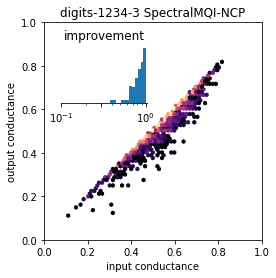

There are  1  connected components in the graph


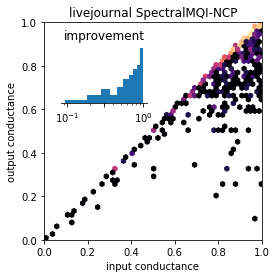

There are  1  connected components in the graph


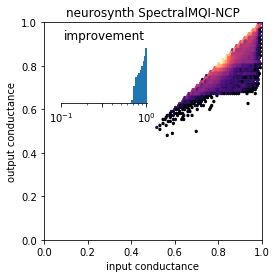

There are  16292  connected components in the graph


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:471: UserWarning:

The graph has multiple (16292) components, using the largest with 159103 / 176056 nodes



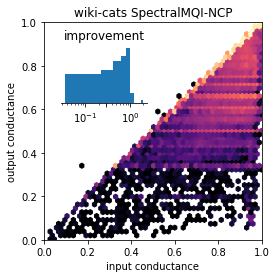

There are  1  connected components in the graph


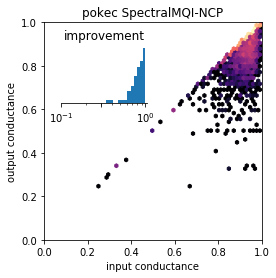

In [6]:
mygraphs = {'digits-1234-3':'digits-1234-3.edges', 
            'neurosynth':'neurosynth-meta.edges.gz',
            'wiki-cats':'wiki-cats.edges', 
            'pokec':'soc-pokec.edges.gz',
            'livejournal':'soc-LiveJournal-scc.edges.gz',
           }

for (gname,gfile) in mygraphs.items():
    g = lgc.GraphLocal(os.path.join("..", "data", gfile),
                                 'edgelist', ' ')
    g.discard_weights()
    run_local_fiedler_ncp(g, gname)


## Track down wiki-cats issue
The wiki-cats experiment (initially) showed that spectralMQI gave back sets with higher conductance than initially. This should be impossible, so we want to understand why.




In [8]:
g = lgc.GraphLocal(os.path.join("..", "data", "wiki-cats.edges"),
                                 'edgelist', ' ')
g.discard_weights()
g = g.largest_component()

for i in range(g._num_vertices):
    R = [i]
    R.extend(g.neighbors(R[0])) # build neighborhood
    phi0 = g.set_scores(R)["cond"]
    S,phi1 = lgc.spectral_clustering(g,R,method="fiedler_local")
    if phi1 > phi0:
        print(i)
        break
    

There are  16292  connected components in the graph


/home/dgleich/.local/lib/python3.5/site-packages/localgraphclustering/GraphLocal.py:471: UserWarning:

The graph has multiple (16292) components, using the largest with 159103 / 176056 nodes



6982
